Some testing of Scipy's piecewise polynomial interpolation module.

In [1]:
import numpy as np
import scipy.interpolate as sip
import matplotlib.pyplot as plt

In [108]:
breaks = np.linspace(0, 10, 5)
pieces = breaks.size-1
order = 3
coeffs = np.arange(pieces*order).reshape((order, pieces, 1))

coeffs2 = np.arange(pieces*order).reshape((order, pieces, 1))
coeffs2[:2, 0, 0] = 0  # make first bin constant
coeffs2[:2, -1, 0] = 0  # make last bin constant

PP = sip.PPoly(coeffs, breaks, extrapolate=True)
PP2 = sip.PPoly(coeffs2, breaks, extrapolate=True)

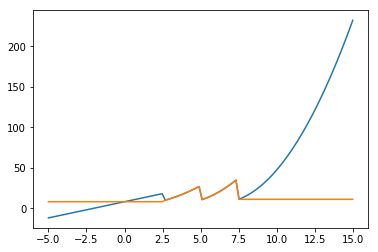

In [56]:
x = np.linspace(-5, 15, 100)
y = PP(x)
y2 = PP2(x)

plt.plot(x, y, x, y2)
plt.show()

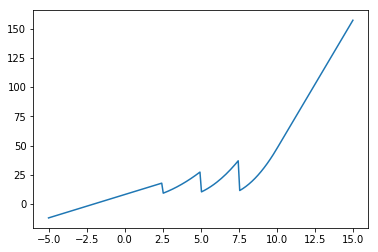

In [109]:
start = np.zeros((order, 1, 1))
start[-1] = PP(breaks[0])
start[-2] = PP(breaks[0], nu=1)

end = np.zeros((order, 1, 1))
end[-1] = PP(breaks[-1])
end[-2] = PP(breaks[-1], nu=1)

PP.extend(end, np.array([breaks[-1]]))
PP.extend(start, np.array([breaks[0]]))

x = np.linspace(-5, 15, 200)
y = PP(x)

plt.plot(x, y)
plt.show()